# Description

This notebook takes the combined csv file that has info about minutes played and team, season, week, opponent, home/away, and player names, and calculates accuracy of simple predictive models that:
- Take last 5 weeks average minutes played. 
- Same but if injured, no minutes played.

Overall, seems like the model that takes into account injuries is better, but only slightly

In [1]:
import pandas as pd
import numpy as np
import os
from utils import last_weeks_avg, get_predicted_minutes_rmse

In [2]:
# Load the combined data
csv_path = ('../datasets/black_dataframe/player_minutes_with_extra_columns_2425.csv')

df = pd.read_csv(csv_path)

In [3]:
weeks = 5

# Apply the function to calculate the last 5 weeks average
df = last_weeks_avg(df, weeks=weeks)

In [4]:
# If injury, then set predicted minutes to 0
df[f'avg_weeks_last_{weeks}_injury'] = df[f'avg_weeks_last_{weeks}'].where(df['reason'] != 'injury', 0)

In [5]:
# Calculate the RMSE between minutes_played and last_weeks_avg
rmse_last_weeks        = get_predicted_minutes_rmse(df, minutes_column='minutes', predicted_column=f'avg_weeks_last_{weeks}')
rmse_last_weeks_injury = get_predicted_minutes_rmse(df, minutes_column='minutes', predicted_column=f'avg_weeks_last_{weeks}_injury')

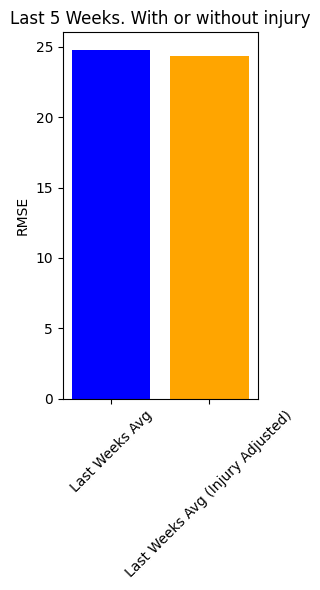

In [6]:
# Plot a brar chart of the RMSE values
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 6))
plt.bar(['Last Weeks Avg', 'Last Weeks Avg (Injury Adjusted)'], [rmse_last_weeks, rmse_last_weeks_injury], color=['blue', 'orange'])
plt.title(f'Last {weeks} Weeks. With or without injury')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig(f'../plots/rmse_last_{weeks}_weeks_avg.png')
plt.show()

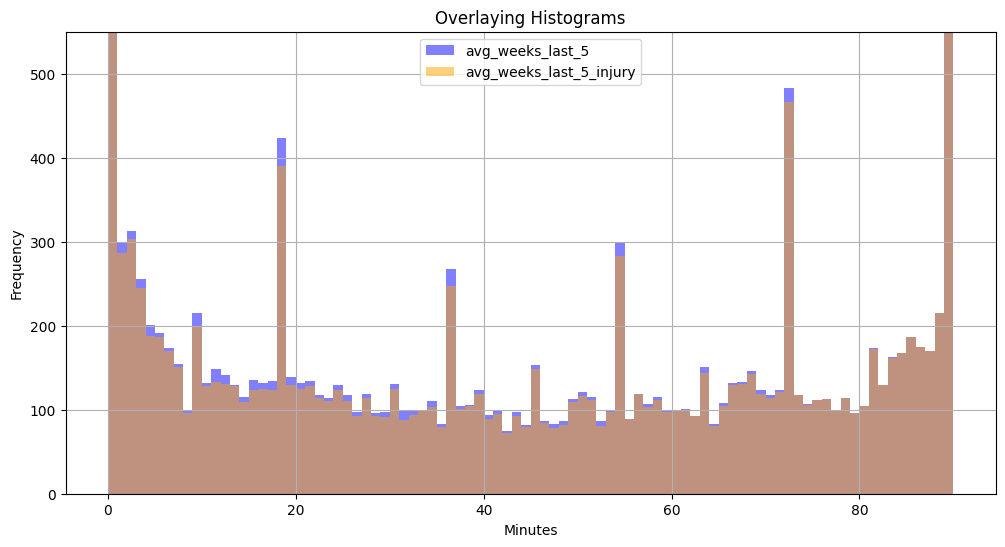

In [7]:
# Plot overlaying histograms of minutes played and last weeks average
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(df[f'avg_weeks_last_{weeks}'],        bins=90, alpha=0.5, label=f'avg_weeks_last_{weeks}', color='blue')
plt.hist(df[f'avg_weeks_last_{weeks}_injury'], bins=90, alpha=0.5, label=f'avg_weeks_last_{weeks}_injury', color='orange')
plt.title('Overlaying Histograms')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
# Add a ylim for 6000
plt.ylim(0, 550)
# plt.savefig('minutes_played_vs_last_weeks_avg.png')
plt.show()

